In [1]:
import os
import dotenv
from interpretability.comparison.analysis.dt.dt import Analysis_DT
from interpretability.comparison.analysis.tt.tt import Analysis_TT
from interpretability.comparison.comparison import Comparison

dotenv.load_dotenv(override=True)
HOME_DIR = os.getenv("HOME_DIR")
task_trained_path = HOME_DIR + "trained_models/task-trained/20240211_NBFF_DSA_Test/"
# %%
# Load the analysis
tt_GRU = task_trained_path
print(tt_GRU)
subdirs = [x[0] for x in os.walk(tt_GRU)]
print(subdirs)
analysis_list = []
for subdir in subdirs[1:]:
    print(subdir)
    analysis_list.append(Analysis_TT(run_name=subdir.split('/')[-1], filepath = subdir + "/"))

for analysis in analysis_list:
    run_name = analysis.run_name
    analysis.save_latents(filepath = run_name)
    print(analysis.run_name)
    print(analysis.filepath)


/home/csverst/Github/InterpretabilityBenchmark/trained_models/task-trained/20240211_NBFF_DSA_Test/
['/home/csverst/Github/InterpretabilityBenchmark/trained_models/task-trained/20240211_NBFF_DSA_Test/', '/home/csverst/Github/InterpretabilityBenchmark/trained_models/task-trained/20240211_NBFF_DSA_Test/latent_size=32 max_epochs=1000 n=4 seed=1', '/home/csverst/Github/InterpretabilityBenchmark/trained_models/task-trained/20240211_NBFF_DSA_Test/latent_size=32 max_epochs=1000 n=4 seed=0', '/home/csverst/Github/InterpretabilityBenchmark/trained_models/task-trained/20240211_NBFF_DSA_Test/latent_size=64 max_epochs=1000 n=4 seed=0', '/home/csverst/Github/InterpretabilityBenchmark/trained_models/task-trained/20240211_NBFF_DSA_Test/latent_size=64 max_epochs=1000 n=3 seed=1', '/home/csverst/Github/InterpretabilityBenchmark/trained_models/task-trained/20240211_NBFF_DSA_Test/latent_size=32 max_epochs=1000 n=3 seed=0', '/home/csverst/Github/InterpretabilityBenchmark/trained_models/task-trained/2024021

In [2]:
rank_sweep = [100,200]
delay_sweep = [4,8]

analysis1 = analysis_list[0]
id_comp, splits_comp = analysis1.find_DSA_hps(
    rank_sweep=rank_sweep, delay_sweep=delay_sweep
)

Rank: 100, Delay: 4
Rank: 100, Delay: 8


In [ ]:
id_comp

array([[1.24882174, 1.16342759],
       [1.40382016, 1.35985303]])

In [ ]:

comp = Comparison()
for analysis in analysis_list:
    comp.load_analysis(analysis)

Computing Hankel matrix ...
Hankel matrix computed!
Computing SVD on Hankel matrix ...
SVD complete!
Computing least squares fits to HAVOK DMD ...
Least squares complete! 

Computing Hankel matrix ...
Hankel matrix computed!
Computing SVD on Hankel matrix ...
SVD complete!
Computing least squares fits to HAVOK DMD ...
Least squares complete! 

Computing Hankel matrix ...
Hankel matrix computed!
Computing SVD on Hankel matrix ...
SVD complete!
Computing least squares fits to HAVOK DMD ...
Least squares complete! 

Computing Hankel matrix ...
Hankel matrix computed!
Computing SVD on Hankel matrix ...
SVD complete!
Computing least squares fits to HAVOK DMD ...
Least squares complete! 

Computing Hankel matrix ...
Hankel matrix computed!
Computing SVD on Hankel matrix ...
SVD complete!
Computing least squares fits to HAVOK DMD ...
Least squares complete! 

Computing Hankel matrix ...
Hankel matrix computed!
Computing SVD on Hankel matrix ...
SVD complete!
Computing least squares fits to HA

array([[0.        , 0.10389865, 0.25308728, 0.23749596, 0.10550921,
        0.11082231, 0.25906989, 0.20155792],
       [0.10389865, 0.        , 0.27029493, 0.25464582, 0.09802757,
        0.10171955, 0.27655733, 0.2178542 ],
       [0.25308728, 0.27029493, 0.        , 0.12048395, 0.27045113,
        0.27777171, 0.11310028, 0.14256079],
       [0.23749596, 0.25464582, 0.12048395, 0.        , 0.25415555,
        0.2613126 , 0.12470543, 0.12027698],
       [0.10550921, 0.09802757, 0.27045113, 0.25415555, 0.        ,
        0.10379227, 0.27697375, 0.21677826],
       [0.11082231, 0.10171955, 0.27777171, 0.2613126 , 0.10379227,
        0.        , 0.28399783, 0.22417977],
       [0.25906989, 0.27655733, 0.11310028, 0.12470543, 0.27697375,
        0.28399783, 0.        , 0.14807682],
       [0.20155792, 0.2178542 , 0.14256079, 0.12027698, 0.21677826,
        0.22417977, 0.14807682, 0.        ]])

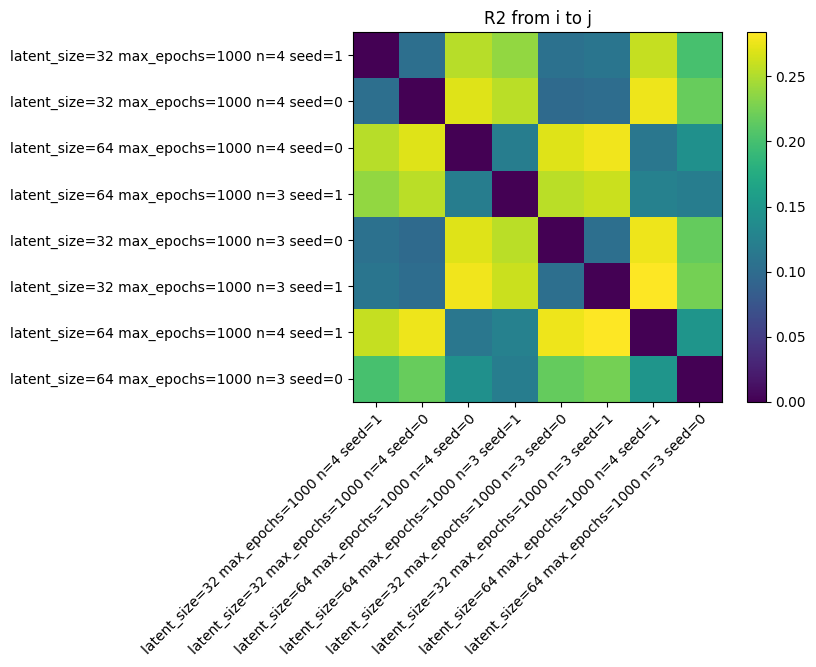

In [ ]:

comp.compare_dynamics_DSA(n_delays=16, rank = 400)
